In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"Telco.csv")

In [65]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [4]:
X.shape

(7010, 44)

# Baseline model for Random Forest

In [67]:
base = RandomForestClassifier()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

In [68]:
base.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
base_pred = base.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

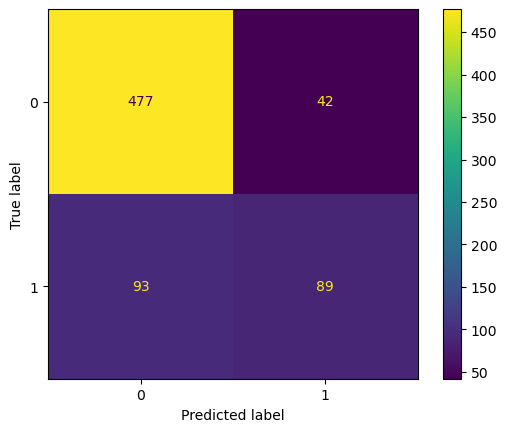

In [71]:
cm = confusion_matrix(y_test,base_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [72]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       519
           1       0.68      0.49      0.57       182

    accuracy                           0.81       701
   macro avg       0.76      0.70      0.72       701
weighted avg       0.80      0.81      0.80       701



# Feature Selection

We are going to try two different methods and we will compare the results.

**Recursive Feature Elimination**

In [40]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

 Clf result : 0.767, +- 0.016 N_features : 5
 Clf result : 0.761, +- 0.016 N_features : 6
 Clf result : 0.767, +- 0.020 N_features : 7
 Clf result : 0.769, +- 0.014 N_features : 8
 Clf result : 0.773, +- 0.015 N_features : 9
 Clf result : 0.777, +- 0.020 N_features : 10
 Clf result : 0.779, +- 0.021 N_features : 11
 Clf result : 0.781, +- 0.022 N_features : 12
 Clf result : 0.782, +- 0.019 N_features : 13
 Clf result : 0.779, +- 0.021 N_features : 14
 Clf result : 0.782, +- 0.017 N_features : 15
 Clf result : 0.783, +- 0.013 N_features : 16
 Clf result : 0.781, +- 0.017 N_features : 17
 Clf result : 0.781, +- 0.014 N_features : 18
 Clf result : 0.784, +- 0.014 N_features : 19
 Clf result : 0.785, +- 0.018 N_features : 20
 Clf result : 0.784, +- 0.016 N_features : 21
 Clf result : 0.783, +- 0.016 N_features : 22
 Clf result : 0.781, +- 0.013 N_features : 23
 Clf result : 0.784, +- 0.014 N_features : 24
 Clf result : 0.782, +- 0.015 N_features : 25
 Clf result : 0.785, +- 0.014 N_feature

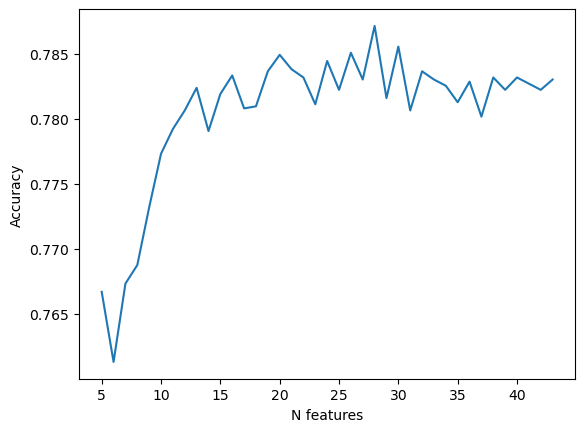

In [15]:
acc_results = []
n_features = []

for i in range(5, 44):
    rfe = RFE(estimator =base, n_features_to_select = i, step=1)
    rfe.fit(X,y)
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y,test_size = 0.1)

    scores = cross_val_score(base, X_train, y_train ,scoring= 'accuracy', cv=10)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [16]:
#selection of features that provide the best accuracy 
rfe = RFE(estimator =base, n_features_to_select = 28, step=1)
rfe.fit(X, y)

#assigning of feature to a list
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()
featured_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Tenure Cohort_0-12 Months',
 'Tenure Cohort_Over 48 Months']

In [73]:
X_rfe = X[featured_columns]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.1,random_state=101)

In [75]:
base.fit(X_train,y_train)
rfe_pred = base.predict(X_test)

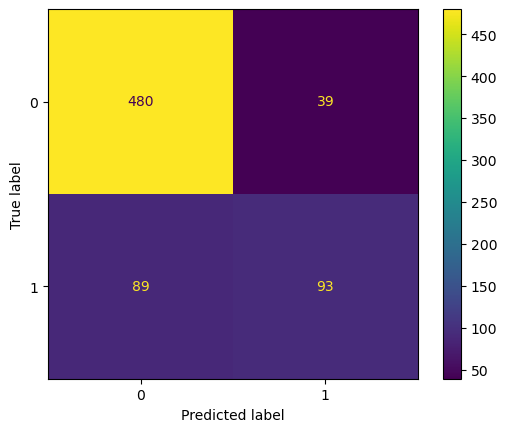

In [76]:
cm = confusion_matrix(y_test,rfe_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [77]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       519
           1       0.70      0.51      0.59       182

    accuracy                           0.82       701
   macro avg       0.77      0.72      0.74       701
weighted avg       0.81      0.82      0.81       701



We managed to improve the accuracy by 0.01 and the recall by 0.02 after RFE.

# Principal Component Analysis

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [24]:
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [25]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[2.52796432e+01 1.53016058e+01 8.13025271e+00 4.59086734e+00
 3.96177096e+00 3.54401821e+00 3.12181826e+00 2.95132837e+00
 2.88835854e+00 2.84146072e+00 2.69957552e+00 2.65468305e+00
 2.63792433e+00 2.50853160e+00 2.31736212e+00 2.25966672e+00
 2.11902022e+00 2.09282191e+00 1.98867085e+00 1.84304229e+00
 1.77422364e+00 1.19217206e+00 1.04425503e+00 1.96369624e-01
 5.83798906e-02 2.17700270e-03 4.98553056e-30 4.07091611e-31
 3.76946710e-31 3.19840792e-31 1.17173983e-31 1.17173983e-31
 1.17173983e-31 1.17173983e-31 1.17173983e-31 1.17173983e-31
 1.17173983e-31 1.17173983e-31 1.17173983e-31 1.17173983e-31
 1.17173983e-31 1.15445919e-31 5.15698755e-32 4.29268016e-32]



In [26]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 25.27964322  40.58124903  48.71150174  53.30236908  57.26414004
  60.80815825  63.92997652  66.88130488  69.76966343  72.61112415
  75.31069967  77.96538272  80.60330705  83.11183865  85.42920077
  87.68886749  89.80788771  91.90070962  93.88938047  95.73242276
  97.5066464   98.69881845  99.74307348  99.93944311  99.997823
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.        ]



Text(0, 0.5, 'Explained variance (%)')

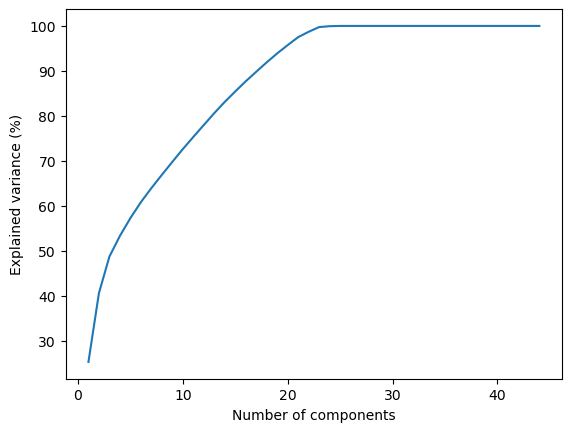

In [27]:
# scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[25.27964322 40.58124903 48.71150174 53.30236908 57.26414004 60.80815825
 63.92997652 66.88130488 69.76966343 72.61112415 75.31069967 77.96538272
 80.60330705 83.11183865 85.42920077 87.68886749 89.80788771 91.90070962]
Number of components: 18


Text(0, 0.5, 'Explained variance (%)')

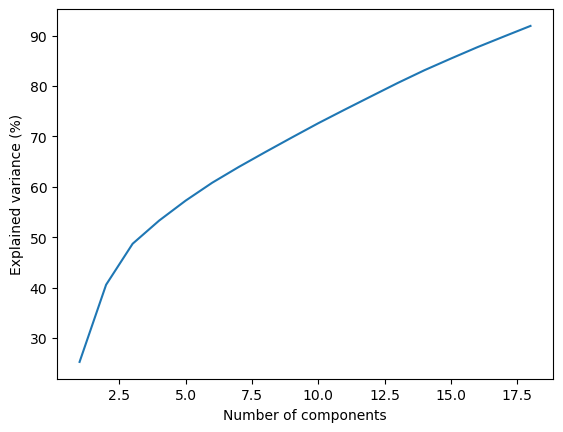

In [114]:
pca = PCA(n_components = 0.9)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [115]:
pca_components = abs(pca.components_)

print('Top 5 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 5)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:5]
    
    # print the top 5 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 5 most important features in each component
Component 0: ['InternetService_Fiber optic', 'StreamingTV_No', 'DeviceProtection_No', 'OnlineBackup_No', 'OnlineSecurity_No']
Component 1: ['tenure', 'TotalCharges', 'Tenure Cohort_24-48 Months', 'StreamingMovies_Yes', 'PaymentMethod_Mailed check']
Component 2: ['MultipleLines_Yes', 'MultipleLines_No', 'PhoneService', 'InternetService_DSL', 'MonthlyCharges']
Component 3: ['MultipleLines_No', 'PhoneService', 'StreamingTV_Yes', 'TechSupport_Yes', 'StreamingMovies_No internet service']
Component 4: ['Churn', 'MultipleLines_No phone service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'DeviceProtection_Yes']
Component 5: ['Tenure Cohort_12-24 Months', 'Contract_Month-to-month', 'PaymentMethod_Mailed check', 'Contract_One year', 'Tenure Cohort_24-48 Months']
Component 6: ['OnlineBackup_No internet service', 'OnlineSecurity_Yes', 'Dependents', 'Partner', 'Tenure Cohort_0-12 Months']
Component 7: ['PaymentMethod_Bank t

In [116]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(7010, 18)
[[-1.58534659 -3.52633594  3.38964606 ... -1.43661506 -0.42204015
   0.6488447 ]
 [-0.4726248  -0.81256355  2.58801396 ...  1.2017108   0.48012066
  -1.19274329]
 [-0.64667439 -3.06924977  2.06073172 ...  1.41575817 -0.02804879
  -0.09496462]
 ...
 [-1.39240059 -3.18852793  4.21569775 ... -1.42706303 -0.74206577
   0.84102461]
 [-1.75003721 -3.42028711 -1.21465179 ...  0.96293977  1.11393816
  -1.13865112]
 [-1.84583852  3.90346589 -0.4434558  ...  1.28170652 -0.18284305
  -0.4052677 ]]


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1,random_state=101)

In [118]:
base.fit(X_train,y_train)
pca_pred = base.predict(X_test)

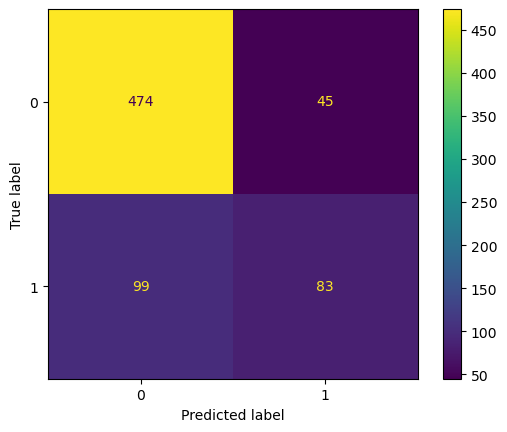

In [119]:
cm = confusion_matrix(y_test,pca_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [120]:
print(classification_report(y_test,pca_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       519
           1       0.65      0.46      0.54       182

    accuracy                           0.79       701
   macro avg       0.74      0.68      0.70       701
weighted avg       0.78      0.79      0.78       701



PCA provided worst results comparing to RFE. The different thresholds used are the following: 0.7, 0.75, 0.8, 0.85, 0.89.
    
We will proceed with RFE.    

# ADASYN

We are going to test if we can impove the results after performing SMOTE resampling.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.1,random_state=101)

In [18]:
from imblearn.over_sampling import ADASYN

In [79]:
ad = ADASYN()

In [80]:
X_res, y_res = ad.fit_resample(X_train, y_train)

In [81]:
import seaborn as sns

C:\Users\George\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

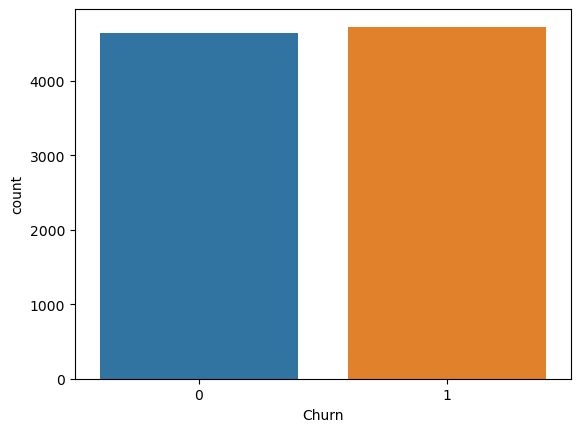

In [82]:
sns.countplot(y_res)

In [83]:
base.fit(X_res,y_res)
ad_pred = base.predict(X_test)

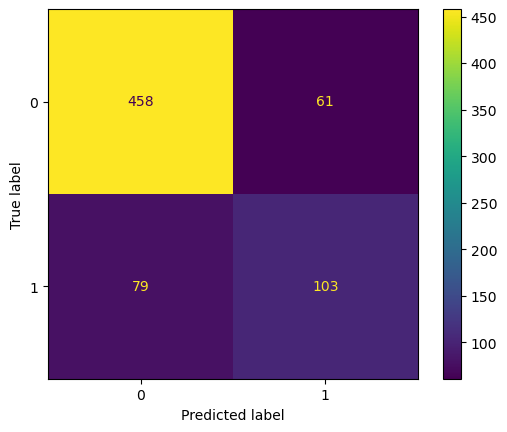

In [84]:
cm = confusion_matrix(y_test,ad_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [85]:
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       519
           1       0.63      0.57      0.60       182

    accuracy                           0.80       701
   macro avg       0.74      0.72      0.73       701
weighted avg       0.79      0.80      0.80       701



The accuracy dropped by 0,2. **We managed to improve the recall of churning class by 0.06.**

In [26]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [175]:
######First we are going to implement RandomSearchCV
criterion = ['gini', 'entropy']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [0.1,0.2, 0.3, 0.4, 0.5]
# Method of selecting samples for training each tree
bootstrap = [True]


random_grid = {
    'criterion':criterion,
    'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
}

In [176]:
rf_random = RandomizedSearchCV(estimator = base, param_distributions = random_grid, 
                               n_iter = 100 ,cv = 5 ,verbose=2, random_state=42, scoring='accuracy')
rf_random.fit(X_res, y_res)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, min_samples_leaf=0.3, min_samples_split=4, n_estimators=1100; total time=   3.6s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, min_samples_leaf=0.3, min_samples_split=4, n_estimators=1100; total time=   5.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, min_samples_leaf=0.3, min_samples_split=4, n_estimators=1100; total time=   7.1s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, min_samples_leaf=0.3, min_samples_split=4, n_estimators=1100; total time=   8.7s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, min_samples_leaf=0.3, min_samples_split=4, n_estimators=1100; total time=   7.8s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.4, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END 

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=0.2, min_samples_split=5, n_estimators=600; total time=   3.8s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=0.2, min_samples_split=5, n_estimators=600; total time=   3.4s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.3, min_samples_split=4, n_estimators=1000; total time=   3.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.3, min_samples_split=4, n_estimators=1000; total time=   3.7s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.3, min_samples_split=4, n_estimators=1000; total time=   3.5s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.3, min_samples_split=4, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min

[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.4, min_samples_split=5, n_estimators=1700; total time=   3.8s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.4, min_samples_split=5, n_estimators=1700; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.4, min_samples_split=5, n_estimators=1700; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.4, min_samples_split=5, n_estimators=1700; total time=   8.7s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=sqrt, min_samples_leaf=0.2, min_samples_split=4, n_estimators=700; total time=   4.8s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=sqrt, min_samples_leaf=0.2, min_samples_split=4, n_estimators=700; total time=   3.4s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=sqrt

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=0.1, min_samples_split=1, n_estimators=600; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=0.1, min_samples_split=1, n_estimators=600; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=0.1, min_samples_split=1, n_estimators=600; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=0.1, min_samples_split=1, n_estimators=600; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=0.1, min_samples_split=1, n_estimators=600; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=0.2, min_samples_split=3, n_estimators=1900; total time=  12.6s
[CV] END bootstrap=True, criterion=gini, max_depth=25, max_features=sqrt, m

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=0.2, min_samples_split=2, n_estimators=800; total time=   4.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=0.2, min_samples_split=2, n_estimators=800; total time=   4.8s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=sqrt, min_samples_leaf=0.3, min_samples_split=5, n_estimators=1300; total time=   6.1s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=sqrt, min_samples_leaf=0.3, min_samples_split=5, n_estimators=1300; total time=   5.4s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=sqrt, min_samples_leaf=0.3, min_samples_split=5, n_estimators=1300; total time=   9.8s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=sqrt, min_samples_leaf=0.3, min_samples_split=5, n_estimators=1300; total time=  11.2s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=700; total time=   2.4s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=700; total time=   4.6s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=700; total time=   6.2s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=700; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=2000; total time=  14.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=2000; total time=  14.7s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, 

[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=3, n_estimators=1600; total time=   5.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=0.1, min_samples_split=4, n_estimators=1400; total time=   9.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=0.1, min_samples_split=4, n_estimators=1400; total time=   9.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=0.1, min_samples_split=4, n_estimators=1400; total time=   7.3s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=0.1, min_samples_split=4, n_estimators=1400; total time=   7.8s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=0.1, min_samples_split=4, n_estimators=1400; total time=   5.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=lo

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.2, min_samples_split=4, n_estimators=1400; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.2, min_samples_split=4, n_estimators=1400; total time=   4.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.2, min_samples_split=4, n_estimators=1400; total time=   4.4s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=5, n_estimators=1600; total time=   4.7s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=5, n_estimators=1600; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=5, n_estimators=1600; total time=   4.4s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.4, min_samples_split=4, n_estimators=1900; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.4, min_samples_split=4, n_estimators=1900; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.4, min_samples_split=4, n_estimators=1900; total time=   4.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.4, min_samples_split=4, n_estimators=1900; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.4, min_samples_split=4, n_estimators=1900; total time=   4.2s
[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=0.3, min_samples_split=4, n_estimators=900; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, mi

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=4, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=log2, min_samples_leaf=0.1, min_samples_split=1, n_estimators=700; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=log2, min_samples_leaf=0.1, min_samples_split=1, n_estimators=700; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=log2, min_samples_leaf=0.1, min_samples_split=1, n_estimators=700; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=log2, min_samples_leaf=0.1, min_samples_split=1, n_estimators=700; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=45, max_features=log2, min_samples_leaf=0.1, min_samples_split=1, n_estimators=700; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min

C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\George\anaconda3\envs\tf\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [0.1, 0.2, 0.3, 0.4,
                                                             0.5],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [181]:
rf_random.best_params_


{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 0.1,
 'max_features': 'log2',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': True}

In [27]:
#random model
random = RandomForestClassifier(n_estimators=2000, min_samples_split=5, min_samples_leaf=0.1,
                                max_features='log2', max_depth=40, bootstrap=True, criterion='gini')
random.fit(X_res,y_res)
rand_pred = random.predict(X_test)

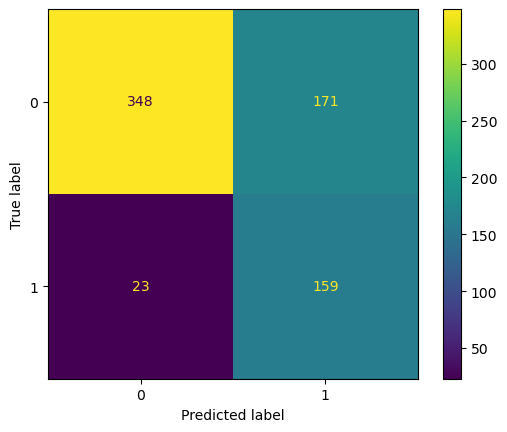

In [28]:
cm = confusion_matrix(y_test,rand_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [29]:
print(classification_report(y_test,rand_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78       519
           1       0.48      0.87      0.62       182

    accuracy                           0.72       701
   macro avg       0.71      0.77      0.70       701
weighted avg       0.82      0.72      0.74       701



We couldn't improve the model further with RandomisedSearhCV.

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [86]:
pred_prob_rf = base.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
auc_score_RF = roc_auc_score(y_test, pred_prob_rf[:,1])

print(auc_score_RF)

0.8366522687331935


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

In [35]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [36]:
base = LogisticRegression(max_iter=4000)

base.fit(scaled_X_train,y_train)
base_pred = base.predict(scaled_X_test)

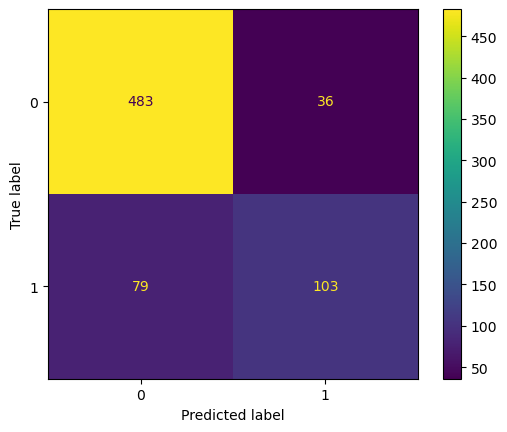

In [37]:
cm = confusion_matrix(y_test,base_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [38]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       519
           1       0.74      0.57      0.64       182

    accuracy                           0.84       701
   macro avg       0.80      0.75      0.77       701
weighted avg       0.83      0.84      0.83       701



# RFE

 Clf result : 0.782, +- 0.015 N_features : 5
 Clf result : 0.786, +- 0.014 N_features : 6
 Clf result : 0.790, +- 0.022 N_features : 7
 Clf result : 0.787, +- 0.022 N_features : 8
 Clf result : 0.789, +- 0.020 N_features : 9
 Clf result : 0.791, +- 0.022 N_features : 10
 Clf result : 0.793, +- 0.020 N_features : 11
 Clf result : 0.791, +- 0.025 N_features : 12
 Clf result : 0.793, +- 0.023 N_features : 13
 Clf result : 0.790, +- 0.022 N_features : 14
 Clf result : 0.791, +- 0.024 N_features : 15
 Clf result : 0.791, +- 0.024 N_features : 16
 Clf result : 0.792, +- 0.023 N_features : 17
 Clf result : 0.793, +- 0.023 N_features : 18
 Clf result : 0.793, +- 0.023 N_features : 19
 Clf result : 0.792, +- 0.023 N_features : 20
 Clf result : 0.792, +- 0.023 N_features : 21
 Clf result : 0.792, +- 0.023 N_features : 22
 Clf result : 0.792, +- 0.023 N_features : 23
 Clf result : 0.792, +- 0.023 N_features : 24
 Clf result : 0.792, +- 0.023 N_features : 25
 Clf result : 0.792, +- 0.023 N_feature

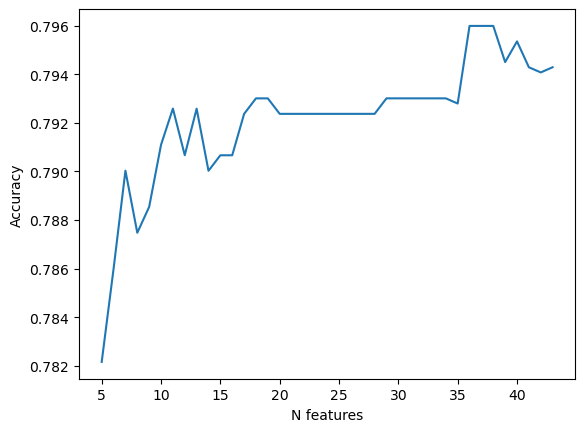

In [195]:
acc_results = []
n_features = []

for i in range(5, 44):
    rfe = RFE(estimator = base, n_features_to_select = i, step=1)
    rfe.fit(X,y)
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y,test_size = 0.33)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(base, X_train, y_train ,scoring= 'accuracy', cv=10)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [41]:
#selection of features that provide the best accuracy 
rfe = RFE(estimator =base, n_features_to_select = 36, step=1)
rfe.fit(X, y)

#assigning of feature to a list
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()
featured_columns

['SeniorCitizen',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Tenure Cohort_0-12 Months',
 'Tenure Cohort_12-24 Months',
 'Tenure Cohort_24-48 Months',
 'Tenure Cohort_Over 48 Months']

In [42]:
Χ_rfe = X[featured_columns]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.1,random_state=101)

In [44]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
base.fit(scaled_X_train,y_train)
rfe_pred = base.predict(scaled_X_test)

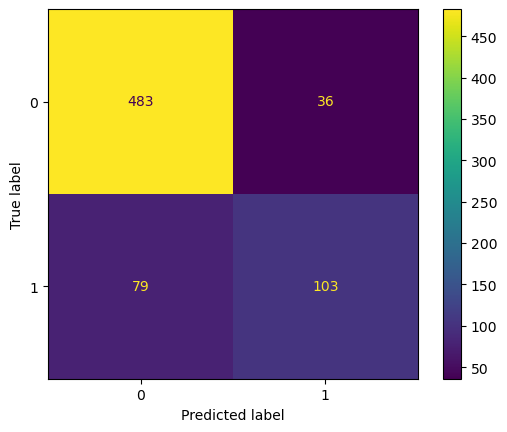

In [46]:
cm = confusion_matrix(y_test,base_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [47]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       519
           1       0.75      0.57      0.65       182

    accuracy                           0.84       701
   macro avg       0.80      0.75      0.77       701
weighted avg       0.83      0.84      0.83       701



The results remained the same after implementing RFE.

In [48]:
X_res, y_res = ad.fit_resample(X_train, y_train)

C:\Users\George\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

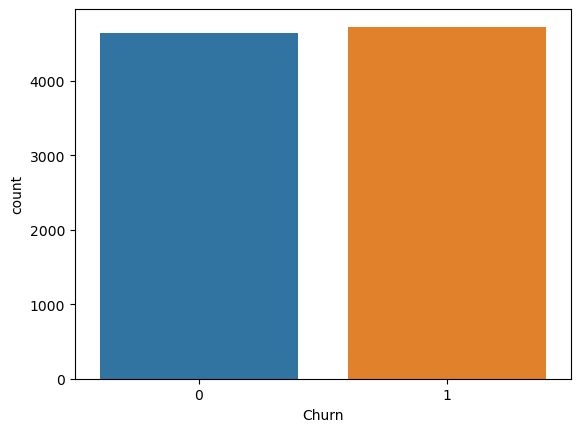

In [49]:
sns.countplot(y_res)

In [50]:
scaled_X_res = scaler.fit_transform(X_res)

In [51]:
base.fit(scaled_X_res,y_res)
ad_pred = base.predict(scaled_X_test)

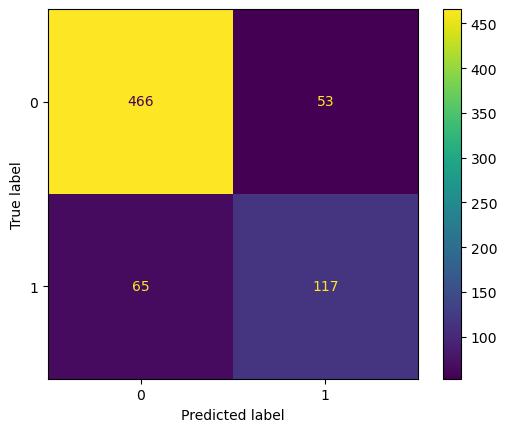

In [52]:
cm = confusion_matrix(y_test,ad_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [53]:
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       519
           1       0.69      0.64      0.66       182

    accuracy                           0.83       701
   macro avg       0.78      0.77      0.78       701
weighted avg       0.83      0.83      0.83       701



Accuracy droped by 0.01, but as we can see we managed to improve the **recall of Logistic Regression by 0.08**.

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters = {'C': np.logspace(-5,5,20), 'multi_class':['ovr'], 
              'fit_intercept':[True, False], 'solver' :['liblinear','newton-cg','saga','sag', 'lbfgs']}

In [56]:
grid_model = GridSearchCV(base,param_grid=parameters,scoring='accuracy')

In [57]:
grid_model.fit(scaled_X_res,y_res)

GridSearchCV(estimator=LogisticRegression(max_iter=4000),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'fit_intercept': [True, False], 'multi_class': ['ovr'],
                         'solver': ['liblinear', 'newton-cg', 'saga', 'sag',
                                    'lbfgs']},
             scoring='accuracy')

In [58]:
grid_model.best_params_

{'C': 6.1584821106602545,
 'fit_intercept': True,
 'multi_class': 'ovr',
 'solver': 'liblinear'}

In [59]:
grid_pred = grid_model.predict(scaled_X_test)

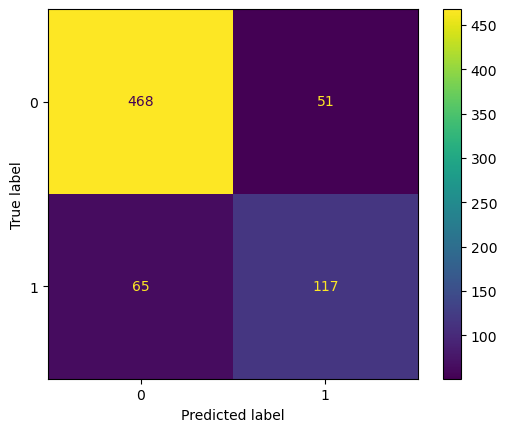

In [60]:
cm = confusion_matrix(y_test,grid_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [61]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       519
           1       0.70      0.64      0.67       182

    accuracy                           0.83       701
   macro avg       0.79      0.77      0.78       701
weighted avg       0.83      0.83      0.83       701



**We couldn't improve the results after implementing GridSearchCV**

In [64]:
pred_prob_log_reg = base.predict_proba(scaled_X_test)

fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
auc_score_log_reg = roc_auc_score(y_test, pred_prob_log_reg[:,1])

print(auc_score_log_reg)

0.8699633699633699


# SVC

In [87]:
from sklearn.svm import SVC

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [118]:
base = SVC(probability=True)

base.fit(scaled_X_train,y_train)
pred = base.predict(scaled_X_test)

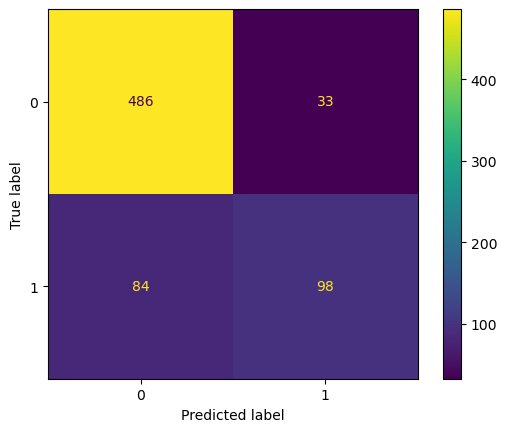

In [92]:
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [93]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       519
           1       0.75      0.54      0.63       182

    accuracy                           0.83       701
   macro avg       0.80      0.74      0.76       701
weighted avg       0.83      0.83      0.82       701



In [94]:
from sklearn.feature_selection import RFECV

In [95]:
estimator = SVC(kernel="linear")
selector = RFECV(estimator, step=1, scoring='accuracy', cv=10)
selector = selector.fit(X, y)
print("Features selected", selector.support_)
print("Feature ranking", selector.ranking_)

Features selected [ True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Feature ranking [1 1 1 1 1 1 1 3 4 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [96]:
featured_columns = pd.DataFrame(selector.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()
featured_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Tenure Cohort_0-12 Months',
 'Tenure Cohort_

In [97]:
Χ_rfe = X[featured_columns]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.1,random_state=101)

In [99]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [100]:
base.fit(scaled_X_train,y_train)
rfe_pred = base.predict(scaled_X_test)

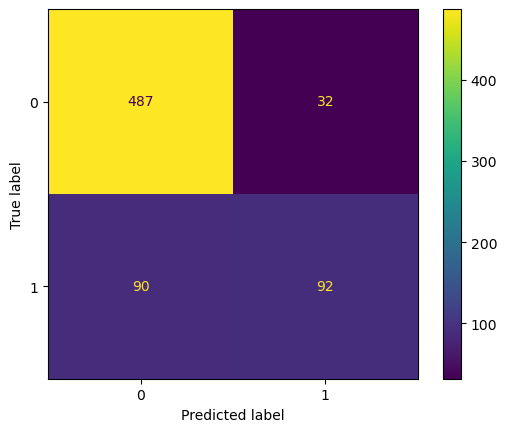

In [101]:
cm = confusion_matrix(y_test,rfe_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [102]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       519
           1       0.74      0.51      0.60       182

    accuracy                           0.83       701
   macro avg       0.79      0.72      0.74       701
weighted avg       0.82      0.83      0.81       701



In [103]:
X_res, y_res = ad.fit_resample(X_train, y_train)

C:\Users\George\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

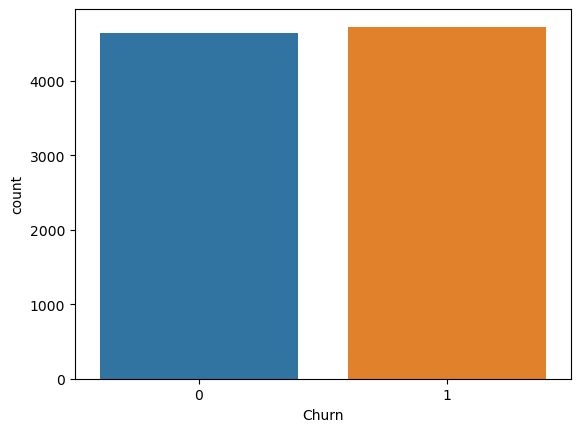

In [104]:
sns.countplot(y_res)

In [105]:
scaled_X_res = scaler.fit_transform(X_res)

In [119]:
base.fit(scaled_X_res,y_res)
ad_pred = base.predict(scaled_X_test)

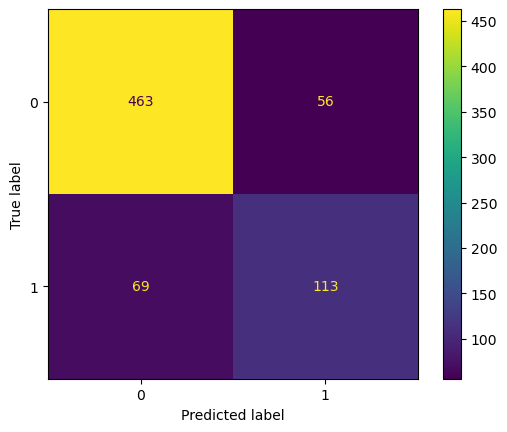

In [120]:
cm = confusion_matrix(y_test,ad_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [121]:
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       519
           1       0.67      0.62      0.64       182

    accuracy                           0.82       701
   macro avg       0.77      0.76      0.76       701
weighted avg       0.82      0.82      0.82       701



The accuracy dropped by 0.01 but we manage to improve the **recall of the churning class by 0.11**

In [109]:
kernel = ['rbf', 'sigmoid']
C = [1,2,3,4,5]
gamma = [0.01,0.02,0.03,0.05,0.1,0.2,'scale','auto']

In [111]:
param_grid = {'kernel': kernel,
              'C': C,
              'gamma': gamma}

grid_model = GridSearchCV(base, param_grid=param_grid, scoring='accuracy')

In [112]:
grid_model.fit(scaled_X_res,y_res)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'gamma': [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 'scale',
                                   'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='accuracy')

In [113]:
grid_model.best_params_

{'C': 5, 'gamma': 0.2, 'kernel': 'rbf'}

In [114]:
grid_pred = grid_model.predict(scaled_X_test)

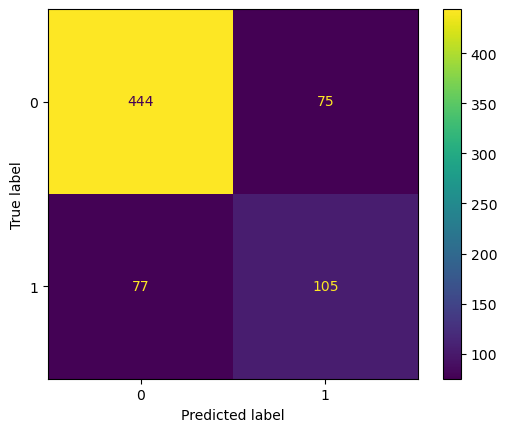

In [115]:
cm = confusion_matrix(y_test,grid_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [116]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       519
           1       0.58      0.58      0.58       182

    accuracy                           0.78       701
   macro avg       0.72      0.72      0.72       701
weighted avg       0.78      0.78      0.78       701



In [122]:
pred_prob_svc = base.predict_proba(scaled_X_test)

fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_svc[:,1], pos_label=1)
auc_score_svc = roc_auc_score(y_test, pred_prob_svc[:,1])

print(auc_score_svc)

0.8358688517648056


Text(0.5, 1.0, 'ROC Curve')

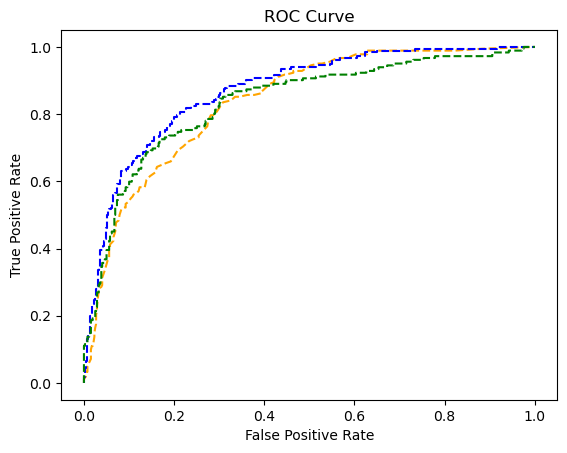

In [127]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='blue', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='SVC')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')